# Assignment 8

### <span style="color:chocolate"> Submission requirements </span>

Your work will not be graded if your notebook doesn't include output. In other words, <span style="color:red"> make sure to rerun your notebook before submitting to Gradescope </span> (Note: if you are using Google Colab: go to Edit > Notebook Settings  and uncheck Omit code cell output when saving this notebook, otherwise the output is not printed).

Additional points may be deducted if these requirements are not met:
    
* Comment your code;
* Each graph should have a title, labels for each axis, and (if needed) a legend. Each graph should be understandable on its own;
* Try and minimize the use of the global namespace (meaning, keep things inside functions).

---

#### ``Objectives``
1. Implement K-means clustering

#### ``Motivation``

[The RGB color model](https://en.wikipedia.org/wiki/RGB_color_model) is an additive color model in which the red, green, and blue primary colors of light are added together in various ways to reproduce a broad array of colors. 

There are plenty of RGB-to-color converters on the web 
https://www.rapidtables.com/convert/color/rgb-to-hex.html

These two RGB triples look almost identical to the human eye:
- [0, 0, 255]
- [0, 1, 255]

However there is no "reverse lookup" that tells you that "this color is close to blue" unless it is a [basic](https://en.wikipedia.org/wiki/Web_colors#Basic_colors) or [extended](https://en.wikipedia.org/wiki/Web_colors#Extended_colors) color with a specified RGB value.

#### ``Data``

For this assignment you are provided a file with RGB triples.

### Import libraries

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
import sys
import os

---
### Step 1: Data ingestion

The RGB color data we will import was sourced from a collection of digital ad images. The project's objective was to determine if certain colors were indicative of high-performing ads.

Before creating a predictive model, it was essential to classify the colors of the RGB triples present in the images.

It's important to note that if the color values were uniformly distributed, clustering would not provide any valuable insights.

In [2]:
# read data
data_file = "HW08_rgb_colors.csv"
df_colors = pandas.read_csv(data_file)

#### <span style="color:chocolate"> Exercise 1:</span> Getting to know the data (10 points)

Answer the following questions:
    
1. How many columns does the dataset contain?
2. How many rows are there in the dataset?
3. What are the column names?
4. Print the first five examples in the dataset.

In [3]:
# 1. Columns in the dataset
print(f"Columns in the dataset: {df_colors.shape[1]}")

# 2. Rows in the dataset
print(f"\nRows in the dataset: {df_colors.shape[0]}")

# 3a. get a list of the column names
col_names = list(df_colors.columns)

# 3b. print the column names
print(f"\nThe column names of the dataset:")
for name in col_names: print(f"\t{name}")

# 4. First five examples
print("\nFirst five examples of the dataset:\n")
df_colors.head()

Columns in the dataset: 3

Rows in the dataset: 2030

The column names of the dataset:
	red
	green
	blue

First five examples of the dataset:



,red,green,blue
0,233,197,146
1,183,97,58
2,188,84,7
3,247,252,254
4,248,253,253


---
### Step 2: Exploratory Data Analysis (EDA)

#### <span style="color:chocolate"> Exercise 2:</span> 3D plot of RGB colors (10 points)

To visually confirm that similar colors are located close to each other in the 3-dimensional RGB space:

1. Use the <span style="color:chocolate"> matplotlib</span> library to plot the RGB components and verify this relationship (use the colors array defined below to specify the color for each data point).

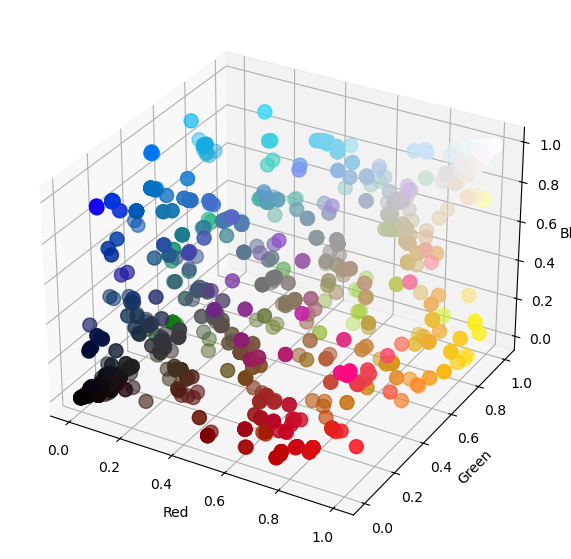

In [4]:
# define colors
colors = np.array(df_colors.values)/255 # colors need to be (r,b,g) tuple in the range of 0-1

# create the 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Extract the RGB components
R, G, B = colors[:, 0], colors[:, 1], colors[:, 2]

# Scatter plot with specified colors for each point
ax.scatter(R, G, B, c=colors, s=100)  # 'c=colors' assigns colors to points

# Label the axes
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')

# Show the plot
plt.show()

---
### Step 3: Clustering algorithm

Clustering algorithms are essential tools for exploring and understanding data patterns without prior knowledge of labels or categories. In this assignment, we will explore the KMeans clustering algorithm.

#### <span style="color:chocolate"> Exercise 3:</span> KMeans (10 points)

1. Fill in the <span style="color:green">NotImplemented</span> parts of the <span style="color:chocolate">fit_kmeans()</span> function below.

2. Fit a KMeans model with 10 clusters. Make sure to pass the random_state argument;

3. Use the <span style="color:chocolate"> predict() </span> method to get the cluster predictions for each data point;
   
5. Add the cluster predictions to the <span style="color:chocolate"> df_colors </span> dataframe. 

In [5]:
# set params
n_clusters = 10
random_state = 10  # makes sure you get the same results each time

# create a np array for RBG values
X = np.array(df_colors.values)

# define KMeans model
def fit_kmeans(X, n_clusters, random_state):
  model = KMeans(n_clusters=n_clusters, random_state=random_state)
  model.fit(X)
  return model

# fit KMeans model
kmeans_model = fit_kmeans(X, n_clusters, random_state)

# get cluster predictions
predictions = kmeans_model.predict(X)

# add predictions to df_colors
df_colors['Cluster'] = predictions

/home/jdhesi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


---
### Step 4: Statistics

#### <span style="color:chocolate"> Exercise 4:</span> Distribution of clusters (10 points)

1. Analyze the distribution of clusters using a histogram plot. Set the numbers of bins to 10.
2. Ensure that your visual representation aligns with the results obtained from
<span style="color:chocolate"> df_colors['cluster'].value_counts()</span>.

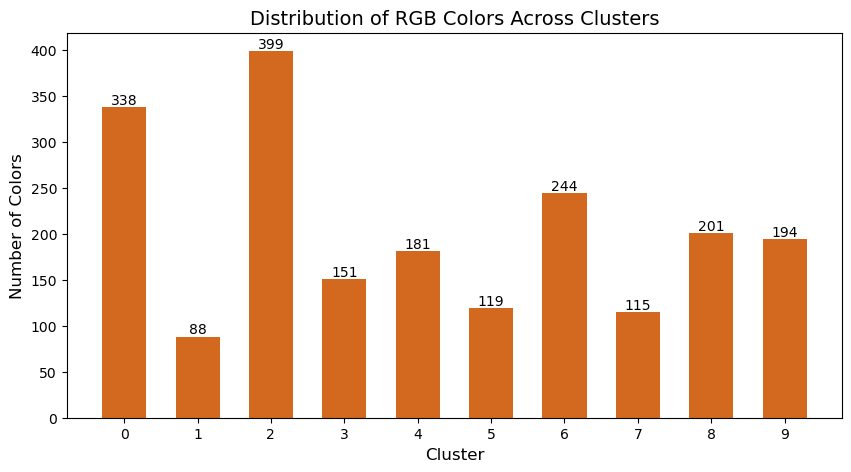

Cluster
0    338
1     88
2    399
3    151
4    181
5    119
6    244
7    115
8    201
9    194
Name: count, dtype: int64


In [6]:
# Distribution of clusters
cluster_counts = df_colors['Cluster'].value_counts().sort_index()

# Histogram of the cluster distribution
plt.figure(figsize=(10, 5))
bars = plt.bar(cluster_counts.index, cluster_counts.values, color='chocolate', width=0.6)

# Set plot labels and title
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Number of Colors', fontsize=12)
plt.title('Distribution of RGB Colors Across Clusters', fontsize=14)

# Ensure the number of bins is set to 10
plt.xticks(range(10))  # Ensure all cluster labels (0-9) appear on the x-axis

# Add data labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X position
        height,  # Y position
        f'{height}',  # Text (height value)
        ha='center',  # Horizontal alignment
        va='bottom',  # Vertical alignment
        fontsize=10  # Font size for readability
    )

# Display the histogram
plt.show()

# Verify with value_counts
print(cluster_counts)

#### <span style="color:chocolate"> Exercise 5:</span> Distribution of colors by cluster (10 points)

Plot the color distribution for each cluster using the first 500 examples in the <span style="color:chocolate"> df_colors</span> data.
 - ensure clusters are on the y-axis and the first 500 examples are on the x-axis.
 - use the **mini_colors** array provided below for the color argument in the plot function.


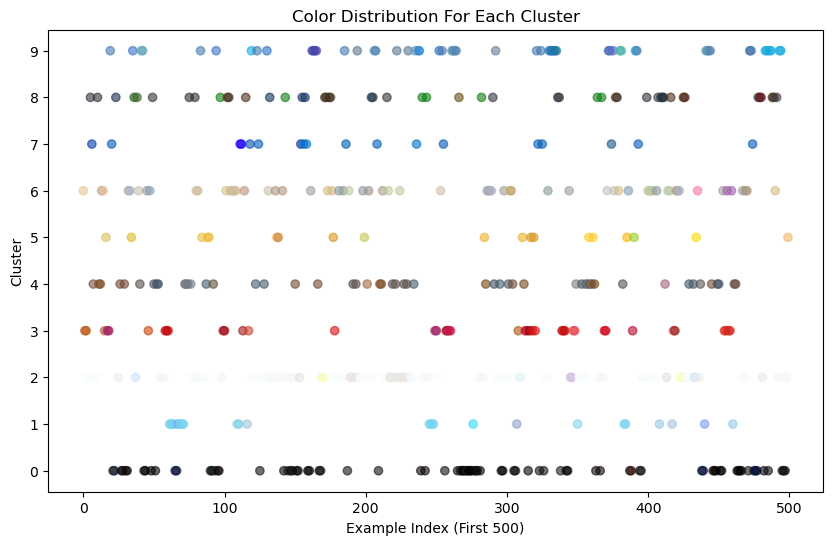

In [7]:
# define colors
mini_colors = colors[:500]

# Ensure the first 500 rows and their cluster labels are used
df_subset = df_colors.iloc[:500]

# plot distribution
plt.figure(figsize=(10, 6))
plt.scatter(x=range(500), y=df_subset['Cluster'], c=mini_colors, alpha=0.6)
plt.title('Color Distribution For Each Cluster')
plt.xlabel('Example Index (First 500)')
plt.ylabel('Cluster')
plt.yticks(range(10))
plt.show()

#### <span style="color:chocolate"> Exercise 6:</span> Cluster centroids (10 points)

Retrieve the centroids of each cluster using the <span style="color:chocolate"> cluster_centers_</span> attribute of the fitted KMeans object.

In [8]:
# Get centroids for each cluster
centroids = kmeans_model.cluster_centers_

# Display the centroids (average RGB values of each cluster)
print("Cluster Centroids (RGB):")
print(centroids)

Cluster Centroids (RGB):
[[ 13.74260355  12.25739645  16.14201183]
 [117.68181818 203.02272727 228.02272727]
 [244.11278195 246.61904762 246.12531328]
 [192.65562914  29.58940397  38.8013245 ]
 [105.6961326   88.13259669  85.56353591]
 [224.60504202 181.31092437  42.06722689]
 [184.58606557 176.51229508 159.07377049]
 [  5.40869565  84.85217391 195.19130435]
 [ 47.96517413  65.42288557  46.38308458]
 [ 58.28865979 131.82989691 179.89690722]]


Next, let's **create a color dictionary** to give color names to each centroid. You will need this dictionary to solve Exercise 7-8.

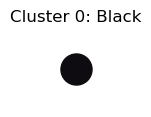

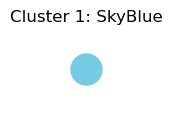

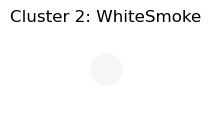

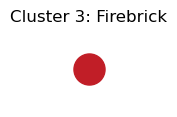

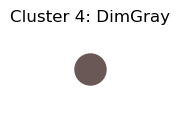

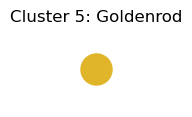

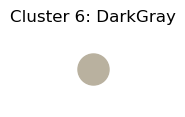

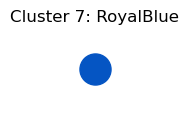

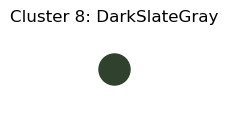

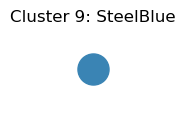

In [9]:
# get the current directory of the script
current_script_dir = os.path.abspath(os.getcwd())

# navigate one directory forward
next_dir = os.path.join(current_script_dir, 'data/RGB_colors/')

# add next_dir to sys.path to make it the current working directory
sys.path.insert(0, next_dir)

# import HW08_color_names.py
import HW08_color_names  

# get closer name for rgb
color_dict = HW08_color_names.get_closest_name_for_rgb(centroids)

# def show_color() function
def show_color(test_color, title):
  # normalize 
  c = [ cc/255 for cc in test_color]  

  # some random coordinates
  x=[1]
  y = [1]

  # plot a large dot
  fig = plt.figure(figsize=(1, 1))
  plt.scatter(x,y,color=c,s=500)
  plt.title(title)
  plt.axis('off')
  return(plt)

# call show_color() function
for cluster in range(n_clusters):
    show_color(centroids[cluster],f'Cluster {cluster}: {color_dict[cluster]}')

---
### Step 5: Test examples

#### <span style="color:chocolate"> Exercise 7:</span> Best guess for an RGB triple based on centroids (20 points)

Fill in the <span style="color:green">NotImplemented</span> parts of the <span style="color:chocolate">guess_color()</span> function below to determine the closest centroid to a user-defined RGB triple (test example) without using the <span style="color:chocolate">KMeans.predict()</span> method. 

The function will calculate distances using the Euclidean distance formula and return the color associated with the nearest centroid.

In [13]:
import math

# your color guessing function
def guess_color(centroids, color_dict, test_color):
    # initialize a minimum distance for any two colors
  closest_distance = float(500) # roughly the maximum euclidean distance any two points can be in color (255,255,255) and (0,0,0)
  color_name = None

  # get euclidean distance for the color from every centroid
  for i, centroid in enumerate(centroids):
      # Calculate the Euclidean distance
      distance = math.sqrt(
          (centroid[0] - test_color[0]) ** 2 +
          (centroid[1] - test_color[1]) ** 2 +
          (centroid[2] - test_color[2]) ** 2
      )
      
      # Check if closest distance
      if distance < closest_distance:
          closest_distance = distance
          color_name = color_dict[i]  # Get the color name associated with this centroid

  return color_name

# user-defined RGB triple
color1 = [200, 5, 5]  # approximately red 

# call the guess_color() function
print(
    guess_color(centroids=centroids, color_dict=color_dict, test_color=color1)
)

Firebrick


#### <span style="color:chocolate"> Exercise 8:</span> Best guess for an RGB triple based on centroids (20 points)

Fill in the <span style="color:green">NotImplemented</span> parts of the <span style="color:chocolate">guess_color()</span> function below to determine the closest centroid to a user-defined RGB triple (test example) by using the <span style="color:chocolate">KMeans.predict()</span> method.

In [15]:
def predict_color(model, color_dict, test_color):
    # closest centroid to test_color
    closest_centroid = model.predict([test_color])[0]
    color_name = color_dict[closest_centroid]
    return color_name

# user-defined RGB triple
color1 = [200, 5, 5] # approximately red 

# call the guess_color() function
print(
    predict_color(model=kmeans_model, color_dict=color_dict, test_color=color1)
)

Firebrick
